In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [9]:
test_results = pd.read_csv('test_results.csv')
user_table = pd.read_csv('user_table.csv')

In [12]:
def merge_tables(table1, table2, on_col):
    return table1.merge(table2, on = on_col)

# Combine tables based on user_id
combined = merge_tables(user_table, test_results, 'user_id')

# Convert timestamp column to datetime format for analysis
combined['timestamp'] = pd.to_datetime(combined['timestamp'], errors='coerce')

# Drop rows with invalid timestamps
combined.dropna(inplace = True)

# Add hour from the timestamp
combined['hour'] = combined['timestamp'].dt.hour

In [13]:
combined.head(1)

,user_id,city,country,lat,long,timestamp,source,device,operative_system,test,price,converted,hour
0,510335,Peabody,USA,42.53,-70.97,2015-05-02 12:06:41,ads-google,mobile,android,0,39,0,12


# Unique types of Sources
'ads-google', 'ads_facebook', 'ads_other', 'direct_traffic', 'ads-bing', 'ads-yahoo' \
'seo-google',  'seo-other', 'seo_facebook', 'seo-bing', 'seo-yahoo' \
'friend_referral'

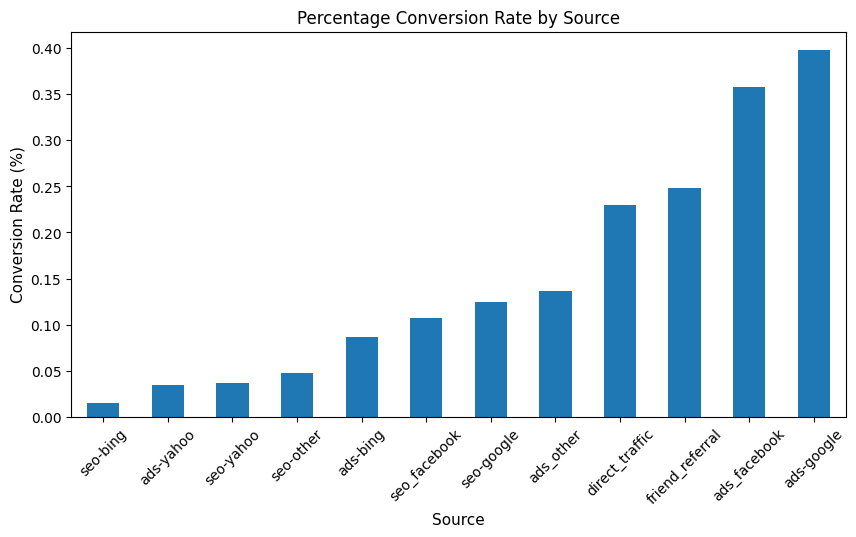

In [ ]:
# Calculate the conversion rate for each source
conversion_rate = combined.groupby('source')['converted'].sum()/len(combined) * 100

# Plot the conversion rate
plt.figure(figsize=(10, 5))
conversion_rate.sort_values().plot(kind='bar')
plt.title('Percentage Conversion Rate by Source')
plt.xlabel('Source', fontsize=11)
plt.ylabel('Conversion Rate (%)', fontsize=11)
plt.xticks(rotation=45)
plt.show()

In [8]:
# combined.to_csv('combined.csv', index = False)

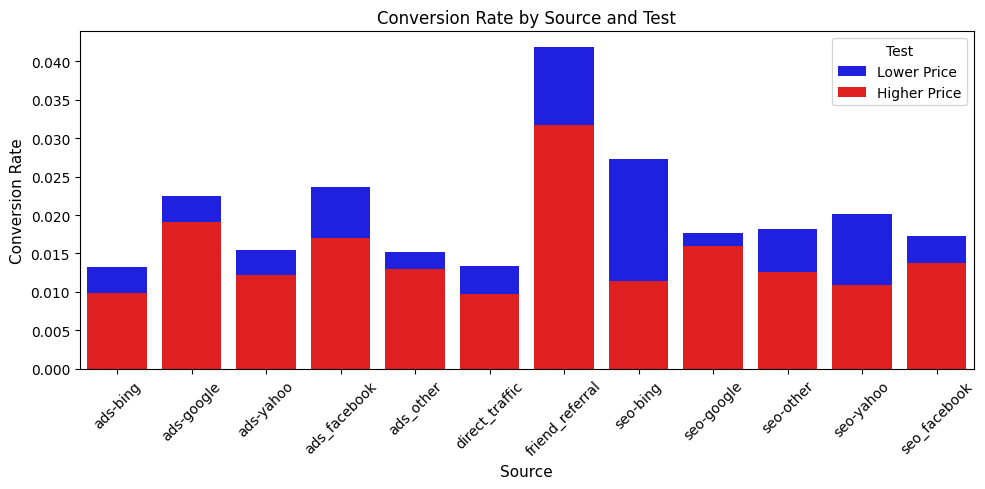

In [9]:
conversion_by_source_test = combined.groupby(['source', 'test'])['converted'].mean().unstack().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=conversion_by_source_test, x='source', y=0, label='Lower Price', color='b')
sns.barplot(data=conversion_by_source_test, x='source', y=1, label='Higher Price', color='r')
plt.title('Conversion Rate by Source and Test')
plt.ylabel('Conversion Rate', fontsize=11)
plt.xlabel('Source', fontsize=11)
plt.legend(title='Test', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

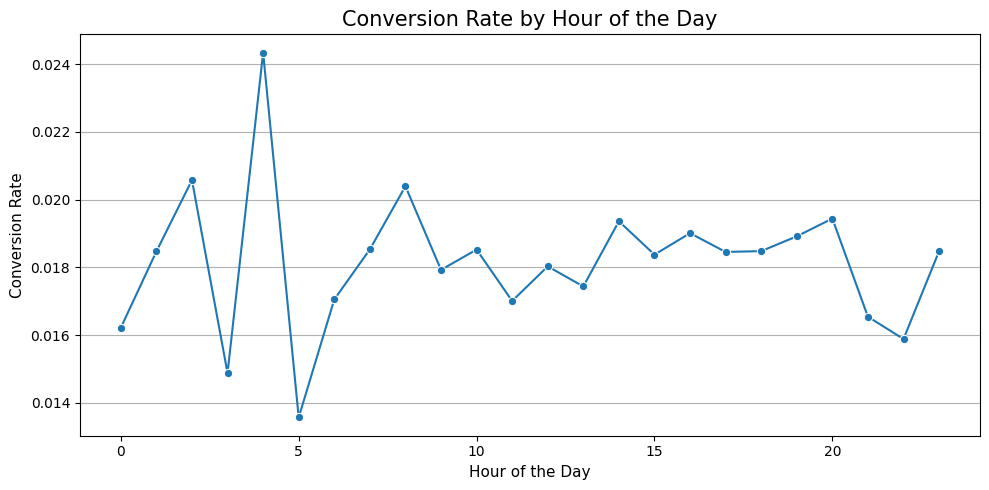

In [ ]:
# Conversion rate by hour
conversion_by_hour = combined.groupby('hour')['converted'].mean().reset_index()

# Plot conversion rate by hour using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=conversion_by_hour, x='hour', y='converted', marker='o')
plt.title('Conversion Rate by Hour of the Day', fontsize=15)
plt.ylabel('Conversion Rate', fontsize=11)
plt.xlabel('Hour of the Day', fontsize=11)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

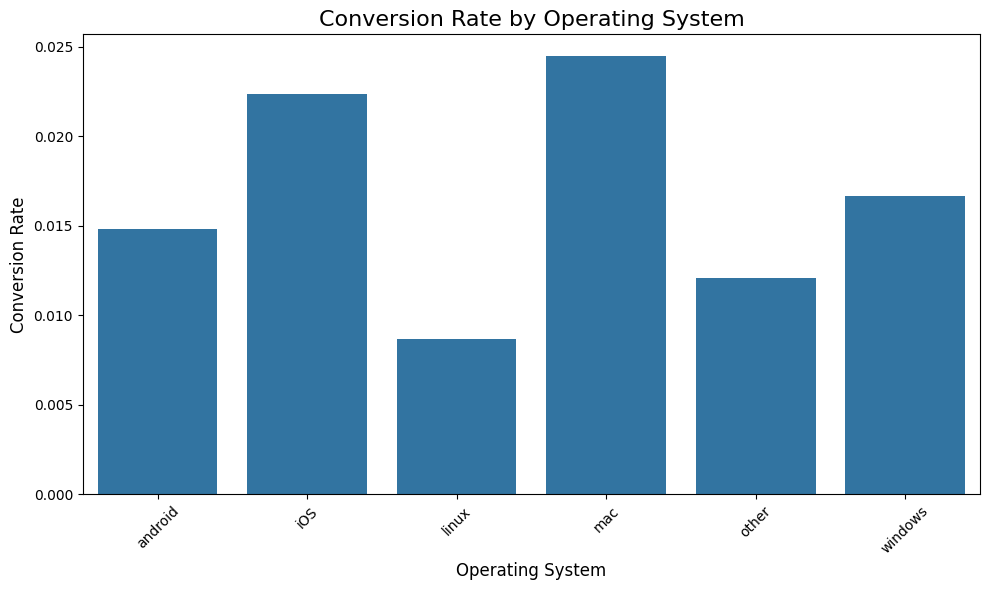

In [11]:
# Operating System Trends
conversion_by_os = combined.groupby('operative_system')['converted'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_by_os, x='operative_system', y='converted')
plt.title('Conversion Rate by Operating System', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xlabel('Operating System', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
combined_small = combined.drop(columns = ['user_id','city','country','test','timestamp'])
print(combined_small.columns)

Index(['lat', 'long', 'source', 'device', 'operative_system', 'price',
       'converted', 'hour'],
      dtype='object')


In [13]:
combined_small['operative_system'].unique()

array(['android', 'windows', 'iOS', 'mac', 'other', 'linux'], dtype=object)

In [14]:
combined_small['source'] = combined_small.source.replace({'ads-google':0,'ads_facebook':1,'ads_other':2,'ads-bing':3,'ads-yahoo':4,'seo-google':5,'seo_facebook':6,'seo-other':7,'seo-bing':8,'seo-yahoo':9,'friend_referral':10,'direct_traffic':11})
combined_small['device'] = combined_small.device.replace({'mobile':0,'web':1})
combined_small['operative_system'] = combined_small.operative_system.replace({'android':0,'iOS':1,'linux':2,'mac':3,'windows':4,'other':5})

C:\Users\dz28l\AppData\Local\Temp\ipykernel_3928\3136767887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_small['source'] = combined_small.source.replace({'ads-google':0,'ads_facebook':1,'ads_other':2,'ads-bing':3,'ads-yahoo':4,'seo-google':5,'seo_facebook':6,'seo-other':7,'seo-bing':8,'seo-yahoo':9,'friend_referral':10,'direct_traffic':11})
C:\Users\dz28l\AppData\Local\Temp\ipykernel_3928\3136767887.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_small['device'] = combined_small.device.replace({'mobile

In [15]:
corrs = combined_small.corr(method='spearman')
corrs

,lat,long,source,device,operative_system,price,converted,hour
lat,1.000000,0.269847,-0.000098,-0.003958,0.000875,0.003201,-0.003347,-0.001819
long,0.269847,1.000000,0.006736,0.007125,0.007753,-0.000923,-0.001250,-0.001827
source,-0.000098,0.006736,1.000000,-0.001846,-0.003558,-0.001134,-0.012315,0.001000
device,-0.003958,0.007125,-0.001846,1.000000,0.732462,0.016182,-0.001985,0.003165
operative_system,0.000875,0.007753,-0.003558,0.732462,1.000000,0.009473,-0.002298,0.005049
price,0.003201,-0.000923,-0.001134,0.016182,0.009473,1.000000,-0.015542,0.002131
converted,-0.003347,-0.001250,-0.012315,-0.001985,-0.002298,-0.015542,1.000000,0.000040
hour,-0.001819,-0.001827,0.001000,0.003165,0.005049,0.002131,0.000040,1.000000


Here, we find very little correlation between price and the other features. The correlation coefficients between price and the other variables are all very small, signaling that there is little correlation, suggesting that a linear regression model may not be fit for this task.

In [16]:
combined_small.columns

Index(['lat', 'long', 'source', 'device', 'operative_system', 'price',
       'converted', 'hour'],
      dtype='object')

In [ ]:
train = combined_small.sample(frac = 0.8)
test = combined_small.drop(index = train.index)

(216890, 8) (54223, 8)


In [19]:
y_train = train['price']
X_train = train.drop(columns = ['price'])
print(X_train.shape, y_train.shape)

y_test = test['price']
X_test = test.drop(columns = ['price'])
print(X_test.shape, y_test.shape)

(216890, 7) (216890,)
(54223, 7) (54223,)


In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

T = DecisionTreeClassifier(max_depth=3)
T.fit(X_train, y_train)

print("Train score:", T.score(X_train, y_train))
print("Test score:", T.score(X_test, y_test))

Train score: 0.6400156761492001
Test score: 0.6387695258469653


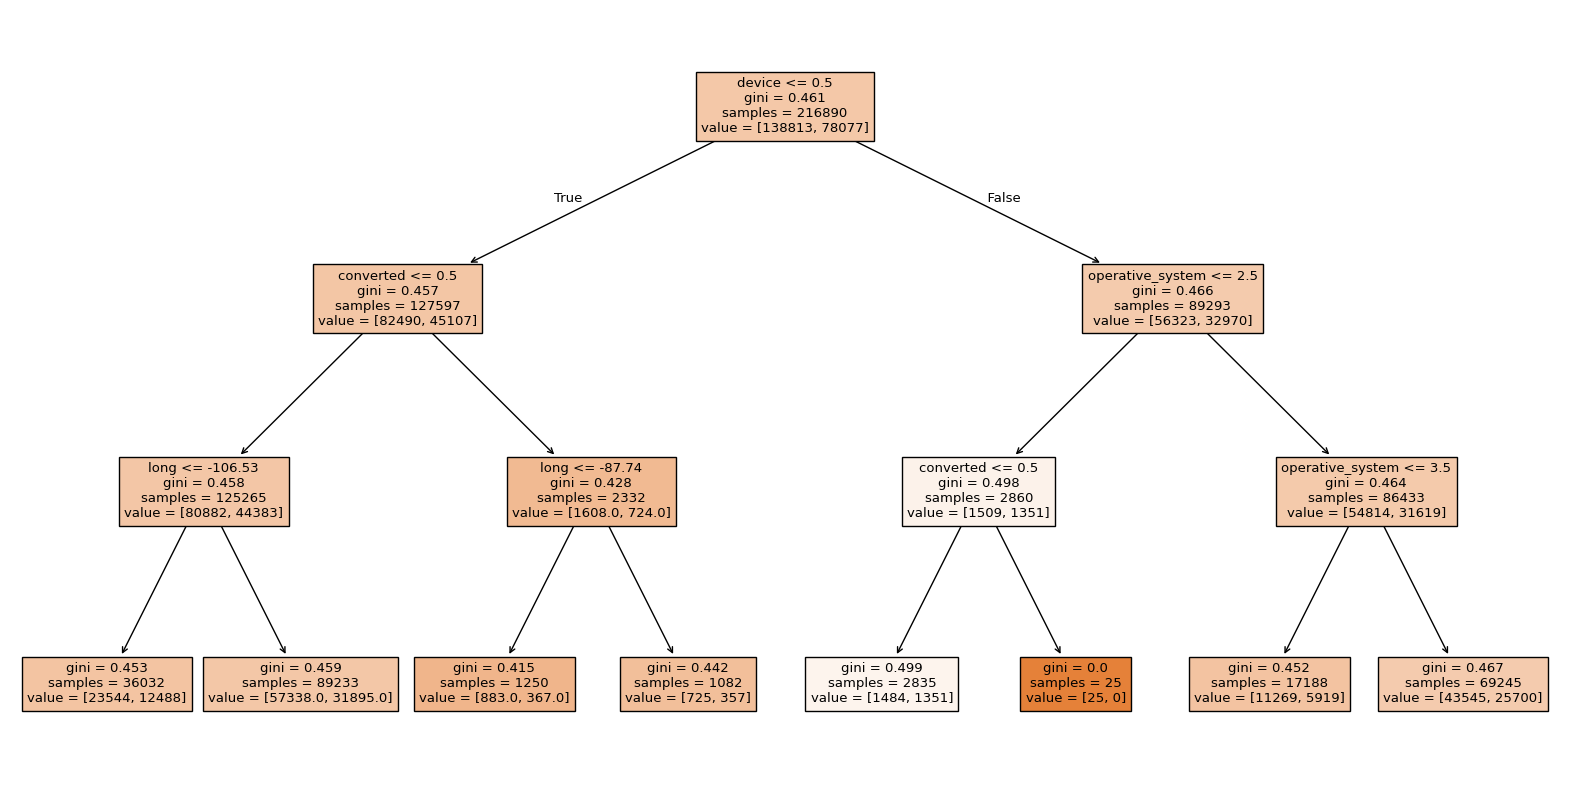

In [21]:
fix, ax = plt.subplots(figsize=(20, 10))
p = plot_tree(T, filled = True, feature_names = X_train.columns)

Data Lifecycle: 
1. Define the Problem: The company is giving users different prices to gather data and find the optimal price to balance profit and conversion rates. The company wants to find the optimal price to charge customers. Our goal here is to create a recommendation to the company on how to set an optimum price for the product. 
2. Data Collection: The data, collected by the company, is comprised of user interactions with the product. There are two datasets: test_results, which records the technical information of the user, like OS and browser, while user_table records user location data. The data is only for customers in the USA, and also does not ensure a balanced geographic distribution, or any other metric. Also, group A is represented more than group B, with group A representing 66% of the dataset and group B representing 33% of the population. There may be some representation bias when it comes to training models. 
3. Data Preparation: To use the data, we combine the two tables by the user ID, in order to create a single, usable dataframe. Then, dropping rows and columns with null values so there are no issues with model training and data visualization. Finally, create "hour" column in the dataframe which is the value of the hour in the 'timestamp' column. This will help with data visualization and analysis. 
4. Data exploration: The curated and processed dataset includes 271113 user entries, with a mix of categorical and numerical features. 

In [15]:
len(combined)

271113